<a href="https://colab.research.google.com/github/saikiranbasa9/Data_science_project/blob/main/Athlete_events.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df =pd.read_csv("/content/gdrive/MyDrive/Athlete Event/athlete_events.csv")

In [ ]:
region = pd.read_csv("/content/gdrive/MyDrive/Athlete Event/noc_regions.csv")

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
region.columns

Index(['NOC', 'region', 'notes'], dtype='object')

In [ ]:
#print(df.isna())
df.drop(columns=["ID"])
df = df[df['Season'] == 'Summer']      #season to Summer
print(df)

            ID  ... Medal
0            1  ...   NaN
1            2  ...   NaN
2            3  ...   NaN
3            4  ...  Gold
26           8  ...   NaN
...        ...  ...   ...
271106  135565  ...   NaN
271107  135566  ...   NaN
271108  135567  ...   NaN
271109  135567  ...   NaN
271110  135568  ...   NaN

[222552 rows x 15 columns]


In [ ]:
df = df.merge(region,on='NOC',how='left')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN


In [ ]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [ ]:
df.duplicated().sum()

1385

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
region.isna().sum()

NOC         0
region      3
notes     209
dtype: int64

In [ ]:
region.duplicated().sum()

0

## 1 - Simple operations and analysis on the dataframe

In [ ]:
print('Countries that participated in olympics are; ',df['region'].unique())
print('Total number of countries that have participated in olympics:',df['region'].nunique())

Countries that participated in olympics are;  ['China' 'Denmark' 'Netherlands' 'Finland' 'Norway' 'Romania' 'Estonia'
 'France' 'Morocco' 'Spain' 'Egypt' 'Iran' 'Bulgaria' 'Italy' 'Chad'
 'Azerbaijan' 'Sudan' 'Russia' 'Argentina' 'Cuba' 'Belarus' 'Greece'
 'Cameroon' 'Turkey' 'Chile' 'Mexico' 'USA' 'Nicaragua' 'Hungary'
 'Nigeria' 'Algeria' 'Kuwait' 'Bahrain' 'Pakistan' 'Iraq' 'Syria'
 'Lebanon' 'Qatar' 'Malaysia' 'Germany' 'Canada' 'Ireland' 'Australia'
 'South Africa' 'Eritrea' 'Tanzania' 'Jordan' 'Tunisia' 'Libya' 'Belgium'
 'Djibouti' 'Palestine' 'Comoros' 'Kazakhstan' 'Brunei' 'India'
 'Saudi Arabia' 'Maldives' 'Ethiopia' 'United Arab Emirates' 'Yemen'
 'Indonesia' 'Philippines' nan 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan'
 'Japan' 'Republic of Congo' 'Switzerland' 'Brazil' 'Monaco' 'Israel'
 'Uruguay' 'Sweden' 'Sri Lanka' 'Armenia' 'Ivory Coast' 'Kenya' 'Benin'
 'UK' 'Ghana' 'Somalia' 'Niger' 'Mali' 'Afghanistan' 'Poland' 'Costa Rica'
 'Panama' 'Georgia' 'Slovenia' 'Guyana' 'New Ze

In [ ]:
df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [ ]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [ ]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472.0,1333.0,1197.0
1,URS,832.0,635.0,596.0
2,GBR,635.0,729.0,620.0
3,GER,592.0,538.0,649.0
4,ITA,518.0,474.0,454.0
...,...,...,...,...
225,AHO,0.0,1.0,0.0
226,LBR,0.0,0.0,0.0
227,LCA,0.0,0.0,0.0
228,LES,0.0,0.0,0.0


In [ ]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
medal_tally

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,0,0,0
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,0,0,0


In [ ]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
medal_tally

,region,Gold,Silver,Bronze
0,USA,1035.0,802.0,708.0
1,Russia,592.0,498.0,487.0
2,Germany,444.0,457.0,491.0
3,UK,278.0,317.0,300.0
4,France,234.0,256.0,287.0
...,...,...,...,...
200,Lesotho,0.0,0.0,0.0
201,Albania,0.0,0.0,0.0
202,Libya,0.0,0.0,0.0
203,Liechtenstein,0.0,0.0,0.0


In [ ]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']
medal_tally

,region,Gold,Silver,Bronze,Total
0,USA,1035.0,802.0,708.0,2545.0
1,Russia,592.0,498.0,487.0,1577.0
2,Germany,444.0,457.0,491.0,1392.0
3,UK,278.0,317.0,300.0,895.0
4,France,234.0,256.0,287.0,777.0
...,...,...,...,...,...
200,Lesotho,0.0,0.0,0.0,0.0
201,Albania,0.0,0.0,0.0,0.0
202,Libya,0.0,0.0,0.0,0.0
203,Liechtenstein,0.0,0.0,0.0,0.0


In [ ]:
#years = df['Year'].unique().tolist()
years = np.unique(df['Year'].dropna()).tolist()
years.sort()
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [ ]:
df['Year'].nunique()

29

In [ ]:
country = np.unique(df['region'].dropna().values).tolist()
country.sort()
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [ ]:
df['region'].nunique()

205

## 2 - Overall Analysis and Calculation of Top Statistics

In [ ]:
years.insert(0,'Overall')
country.insert(0,'Overall')

In [ ]:
medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
medal_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,0,0,0
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,0,0,0


# Function for fetching the medal tally of any country in any year.


In [ ]:
def fetch_medal_tally(year,country):
    
    flag = 0
    
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
        
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
        
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
        
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]
        
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    
    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']
    print(x)

In [ ]:
print('Analysis of medals won by India in 1900')
fetch_medal_tally(1900,'India')

print('\n')

print("Overall Analysis of the countries")
fetch_medal_tally('Overall','Overall')

print('\n')

print("Overall Analysis of India in each and every year")
fetch_medal_tally('Overall','India')

print('\n')

print('Analysis of all the countries in 1900')
fetch_medal_tally(1900,'Overall')

Analysis of medals won by India in 1900
  region  Gold  Silver  Bronze  Total
0  India     0       2       0      2


Overall Analysis of the countries
            region    Gold  Silver  Bronze   Total
0              USA  1035.0   802.0   708.0  2545.0
1           Russia   592.0   498.0   487.0  1577.0
2          Germany   444.0   457.0   491.0  1392.0
3               UK   278.0   317.0   300.0   895.0
4           France   234.0   256.0   287.0   777.0
..             ...     ...     ...     ...     ...
200        Lesotho     0.0     0.0     0.0     0.0
201        Albania     0.0     0.0     0.0     0.0
202          Libya     0.0     0.0     0.0     0.0
203  Liechtenstein     0.0     0.0     0.0     0.0
204        Liberia     0.0     0.0     0.0     0.0

[205 rows x 5 columns]


Overall Analysis of India in each and every year
    Year  Gold  Silver  Bronze  Total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928 

In [ ]:
df['Year'].nunique()

29

In [ ]:
df['Year'].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896])

In [ ]:
print('Total number of times olympic being held:',df['Year'].nunique() - 1)
print('Total number of cities which have participated till now:',df['City'].nunique())
print('Total number of different sports played till now:',df['Sport'].nunique())
print('Total number of events held in olympics held till now:',df['Event'].nunique())
print('Total number of athletes who have participated till now:',df['Name'].nunique())
print('Total number of regions who have participated',df['region'].nunique())

Total number of times olympic being held: 28
Total number of cities which have participated till now: 23
Total number of different sports played till now: 52
Total number of events held in olympics held till now: 651
Total number of athletes who have participated till now: 116122
Total number of regions who have participated 205


In [ ]:
print('Cities which participated in Olympics are:',df['City'].unique())

Cities which participated in Olympics are: ['Barcelona' 'London' 'Antwerpen' 'Paris' 'Los Angeles' 'Helsinki'
 'Sydney' 'Atlanta' 'Stockholm' 'Beijing' 'Rio de Janeiro' 'Athina'
 'Mexico City' 'Munich' 'Seoul' 'Berlin' 'Melbourne' 'Roma' 'Amsterdam'
 'Montreal' 'Moskva' 'Tokyo' 'St. Louis']


In [ ]:
print('Different Sports played throughout the olympics are:',df['Sport'].unique())

Different Sports played throughout the olympics are: ['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics']


In [ ]:
print('Different events which took place at Olympics are:',df['Event'].unique())

Different events which took place at Olympics are: ["Basketball Men's Basketball" "Judo Men's Extra-Lightweight"
 "Football Men's Football" "Tug-Of-War Men's Tug-Of-War"
 "Athletics Women's 100 metres" "Athletics Women's 4 x 100 metres Relay"
 "Swimming Men's 400 metres Freestyle" "Badminton Men's Singles"
 "Sailing Women's Windsurfer" "Swimming Men's 200 metres Breaststroke"
 "Swimming Men's 400 metres Breaststroke"
 "Gymnastics Men's Individual All-Around"
 "Gymnastics Men's Team All-Around" "Gymnastics Men's Floor Exercise"
 "Gymnastics Men's Horse Vault" "Gymnastics Men's Parallel Bars"
 "Gymnastics Men's Horizontal Bar" "Gymnastics Men's Rings"
 "Gymnastics Men's Pommelled Horse" "Athletics Men's Shot Put"
 'Art Competitions Mixed Sculpturing, Unknown Event'
 "Handball Women's Handball" "Weightlifting Women's Super-Heavyweight"
 "Wrestling Men's Light-Heavyweight, Greco-Roman"
 "Gymnastics Men's Team All-Around, Free System"
 "Water Polo Men's Water Polo" 'Sailing Mixed Three Pers

In [ ]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')
nations_over_time.rename(columns={'index':'Year','Year':'No of countries'},inplace=True)
nations_over_time

,Year,No of countries
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [ ]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [ ]:
fig = px.line(nations_over_time,x='Year',y='No of countries')
fig.update_layout(template='plotly_dark',title='Total number of countries participated over the time')
fig.show()

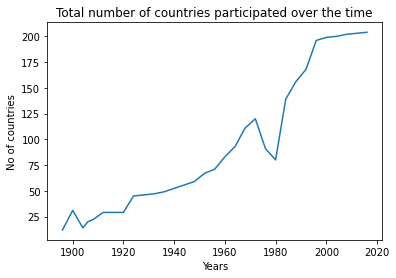

In [ ]:
plt.plot(nations_over_time['Year'],nations_over_time['No of countries'])
plt.xlabel("Years")  
plt.ylabel("No of countries")  
plt.title("Total number of countries participated over the time")  
plt.show()

In [ ]:
events_over_time = df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('index')    

In [ ]:
events_over_time.rename(columns={'index': 'Edition', 'Year': 'Total number of events'}, inplace=True)
events_over_time

,Edition,Total number of events
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
21,1924,131
22,1928,122
20,1932,131


In [ ]:
fig = px.line(events_over_time, x='Edition', y='Total number of events', labels={
     'Total number of events': 'Total number of events held in each year'
    },)
fig.update_layout(template='plotly_dark',title='Events happened over the time')

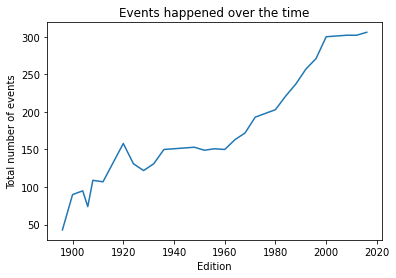

In [ ]:
plt.plot(events_over_time['Edition'],events_over_time['Total number of events'])
plt.xlabel("Edition")  
plt.ylabel("Total number of events")  
plt.title("Events happened over the time")  
plt.show()

In [ ]:
athletes_over_time = df.drop_duplicates(['Year', 'Name'])['Year'].value_counts().reset_index().sort_values('index')

In [ ]:
athletes_over_time.rename(columns={'index': 'Year', 'Year': 'Total number of athletes'}, inplace=True)
athletes_over_time

,Year,Total number of athletes
28,1896,176
25,1900,1220
27,1904,650
26,1906,841
23,1908,2024
22,1912,2409
21,1920,2675
19,1924,3256
20,1928,3246
24,1932,1922


In [ ]:
fig = px.line(athletes_over_time, x='Year', y='Total number of athletes', labels={
        'Total number of athletes': 'Total number of athletes participated over the years',
    },)
fig.update_layout(template='plotly_dark',title='Participation of athletes over the time')

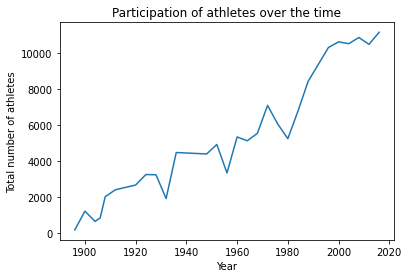

In [ ]:
plt.plot(athletes_over_time['Year'],athletes_over_time['Total number of athletes'])
plt.xlabel("Year")  
plt.ylabel("Total number of athletes")  
plt.title("Participation of athletes over the time")  
plt.show()

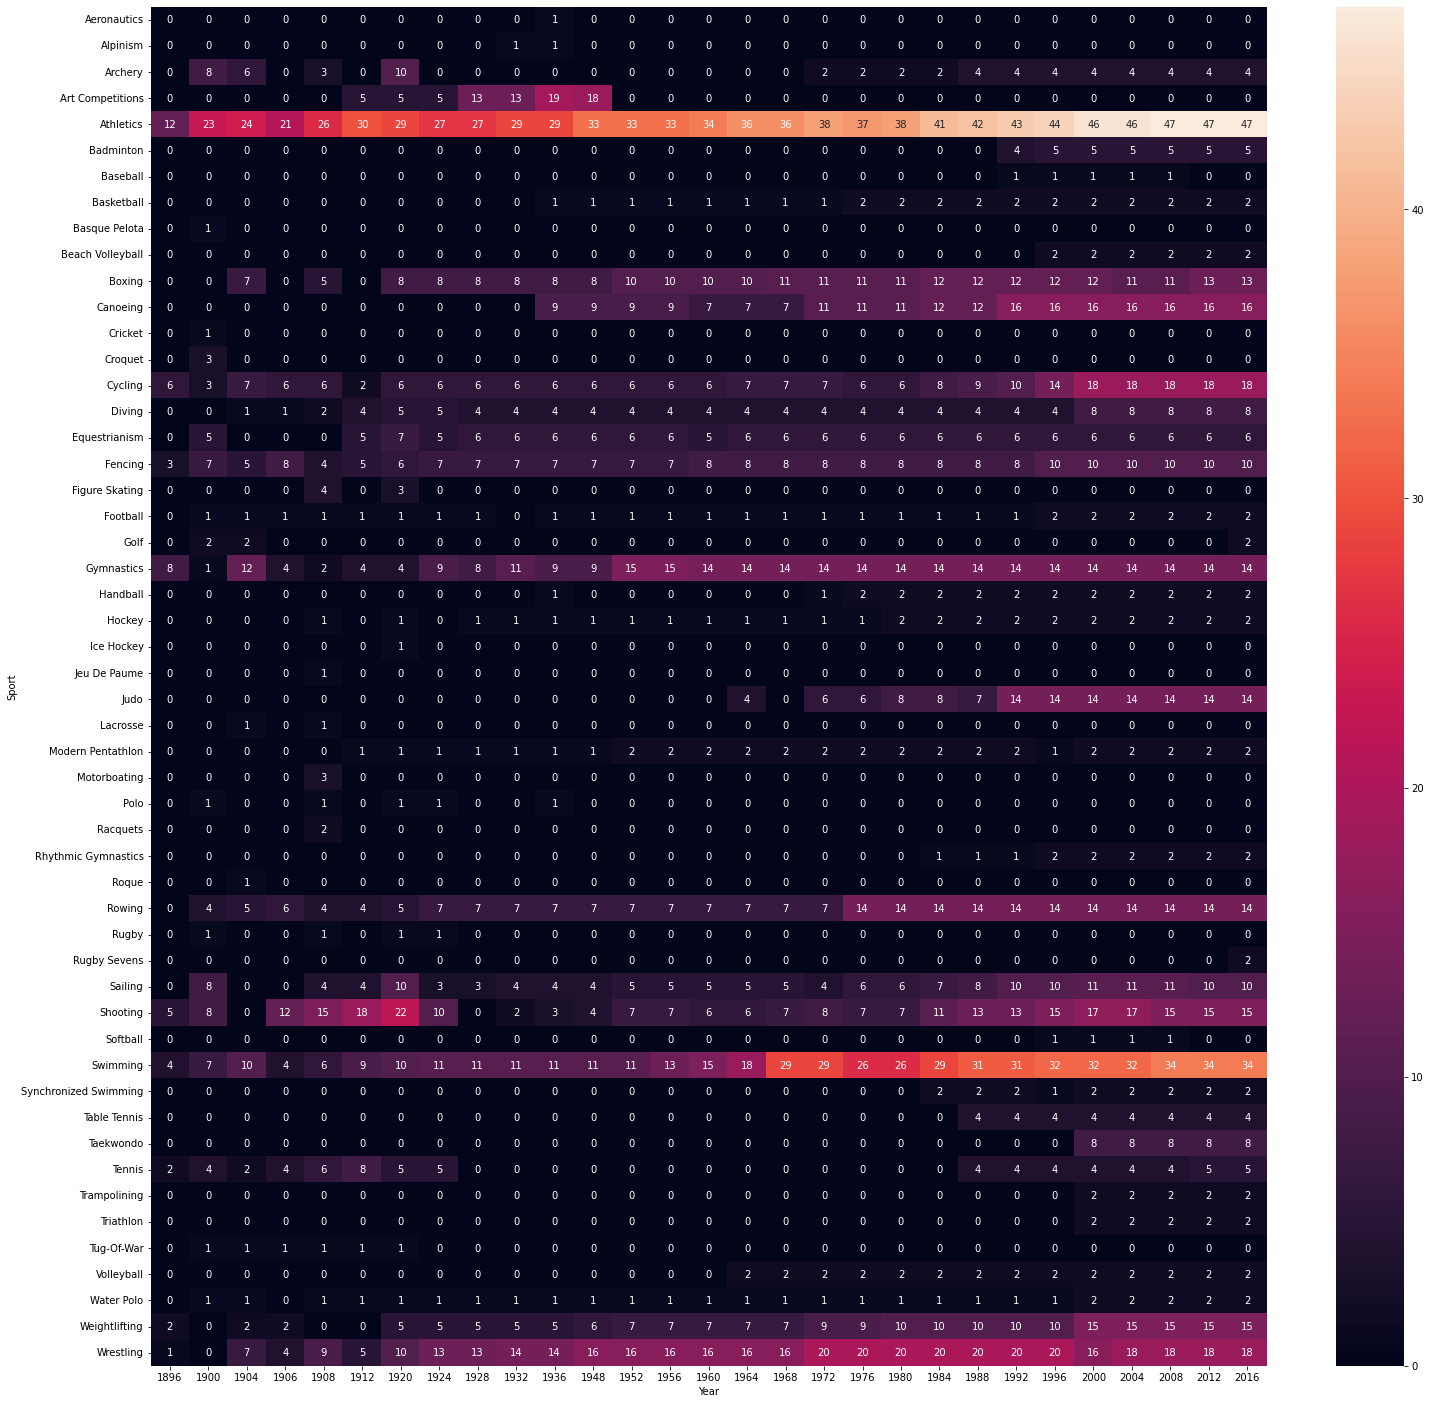

In [ ]:
x = df.drop_duplicates(['Year','Sport','Event'])
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [ ]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='index', right_on='Name', how='left')[
        ['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index')
    x.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    return x

#In this code I have found the overall Top-15 successful athletes in the olympics

In [ ]:
sport_list = df['Sport'].unique().tolist()
sport_list.sort()
sport_list.insert(0, 'Overall')    
x = most_successful(df,'Overall')
x = x.reset_index()
x.drop(columns=['index'], inplace=True)
x

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
1,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
2,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
3,Edoardo Mangiarotti,13,Fencing,Italy
4,Takashi Ono,13,Gymnastics,Japan
5,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
6,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
7,Ryan Steven Lochte,12,Swimming,USA
8,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
9,Sawao Kato,12,Gymnastics,Japan


In [ ]:
fig = px.bar(x, x='Name', y='Medals', color='region', color_continuous_scale='Bluered_r', labels={
        "Name": "Name of the athlete",
        "Medals": "Total medals won by the athlete",
        "region": "Country of the athlete"
    },)
fig.update_layout(template='plotly_dark',title='Top-15 Successfull athletes in the olympics',height=700)

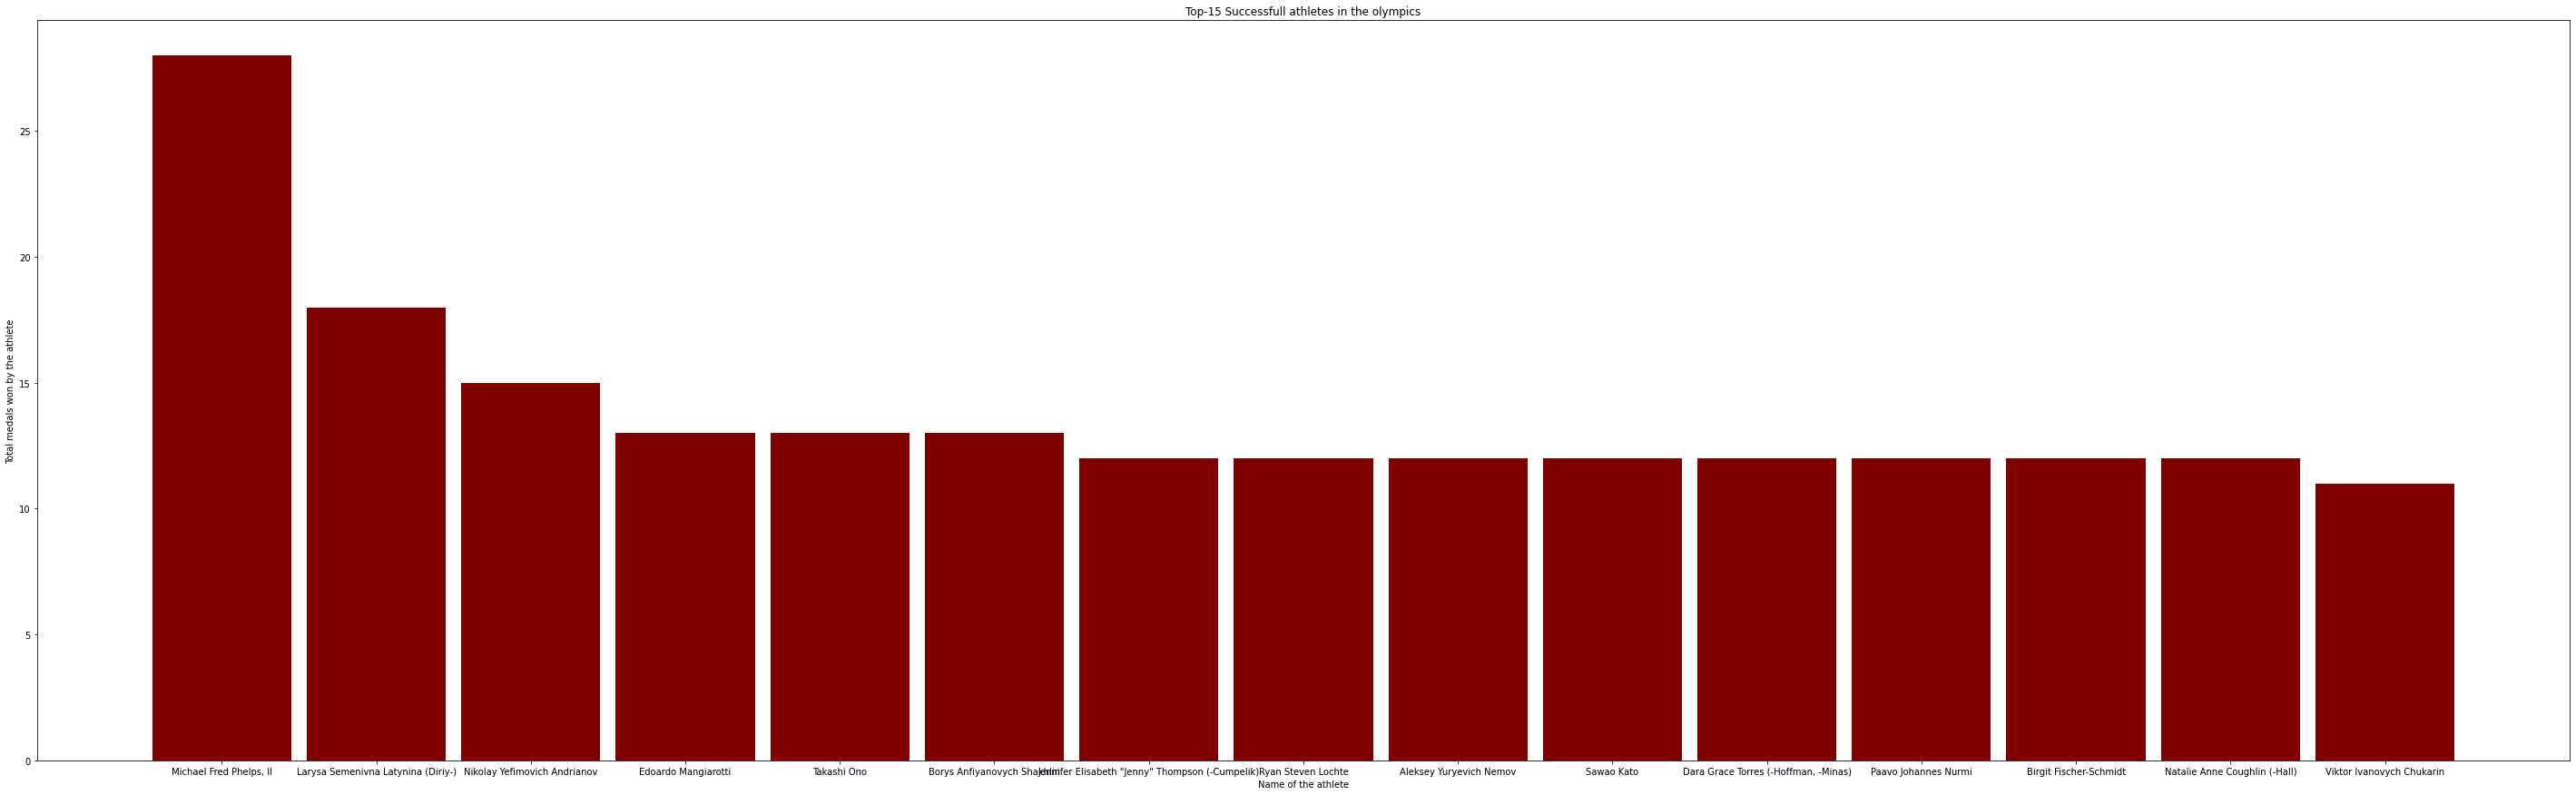

In [ ]:
fig = plt.figure(figsize = (50, 15))

# creating the bar plot
plt.bar(x['Name'], x['Medals'], color ='maroon',	width = 0.9)

plt.xlabel("Name of the athlete")
plt.ylabel("Total medals won by the athlete")
plt.title("Top-15 Successfull athletes in the olympics")
plt.show()


In [ ]:
# Top-15 Successful athletes in Gymnastics
y = most_successful(df,'Gymnastics')
y = y.reset_index()
y.drop(columns=['index'],inplace=True)
y

,Name,Medals,Sport,region
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
1,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
2,Takashi Ono,13,Gymnastics,Japan
3,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
4,Sawao Kato,12,Gymnastics,Japan
5,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
6,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
7,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
8,Polina Hryhorivna Astakhova,10,Gymnastics,Russia
9,gnes Keleti-Srkny (Klein),10,Gymnastics,Hungary


In [ ]:
fig = px.bar(y, x='Name', y='Medals', color='region', color_continuous_scale='Bluered_r', labels={
        "Name": "Name of the athlete",
        "Medals": "Total medals won by the athlete",
        "region": "Country of the athlete"
    },)
fig.update_layout(template='plotly_dark',title='Top-15 Successfull athletes in Gymnastics',height=700)

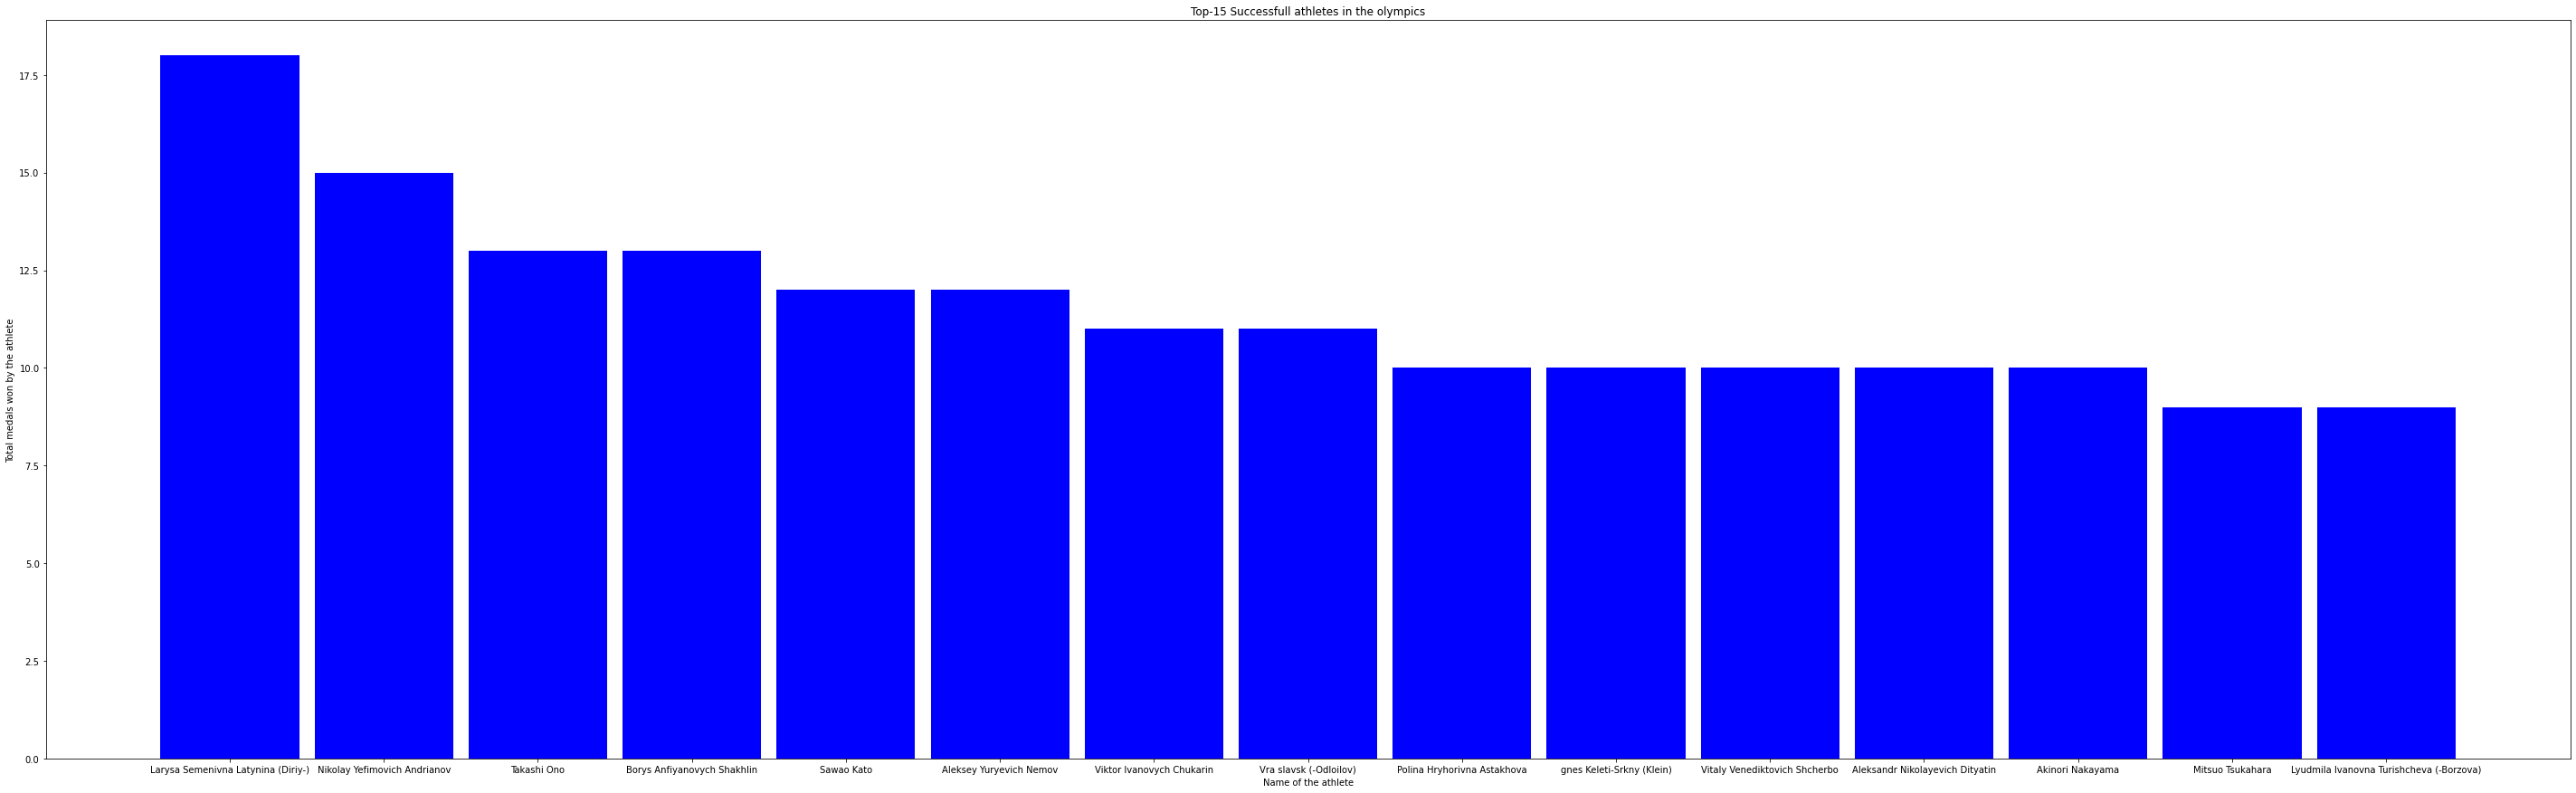

In [ ]:
fig = plt.figure(figsize = (50, 15))

# creating the bar plot
plt.bar(y['Name'], y['Medals'], color ='blue',	width = 0.9)

plt.xlabel("Name of the athlete")
plt.ylabel("Total medals won by the athlete")
plt.title("Top-15 Successfull athletes in the olympics")
plt.show()

## 3 - Country Wise Analysis

In [ ]:
temp_df = df.dropna(subset=['Medal'])
#Removing duplicates for team sports
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)
temp_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
12,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1,0,0
13,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,1,0,0
15,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,1,0,0
16,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222486,135521,Anton Zwerina,M,23.0,NaN,66.0,Austria,AUT,1924 Summer,1924,Summer,Paris,Weightlifting,Weightlifting Men's Lightweight,Silver,Austria,NaN,0,0,1
222508,135535,Claudia Antoinette Zwiers,F,22.0,181.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,Bronze,Netherlands,NaN,1,0,0
222526,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold,Russia,NaN,0,1,0
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1


In [ ]:
new_df = temp_df[temp_df['region'] == 'USA']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()
final_df

,Year,Medal
0,1896,19
1,1900,54
2,1904,231
3,1906,23
4,1908,46
5,1912,63
6,1920,95
7,1924,99
8,1928,56
9,1932,110


In [ ]:
fig = px.line(final_df,x='Year',y='Medal',labels={
    'Medal': 'Total number of medals'
})
fig.update_layout(template='plotly_dark',title='Total number of medals won by a particular country(For eg- USA) during each year')
fig.show()

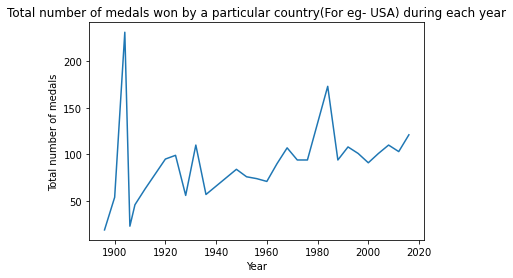

In [ ]:
plt.plot(final_df['Year'],final_df['Medal'])
plt.xlabel("Year")  
plt.ylabel("Total number of medals")  
plt.title("Total number of medals won by a particular country(For eg- USA) during each year")  
plt.show()

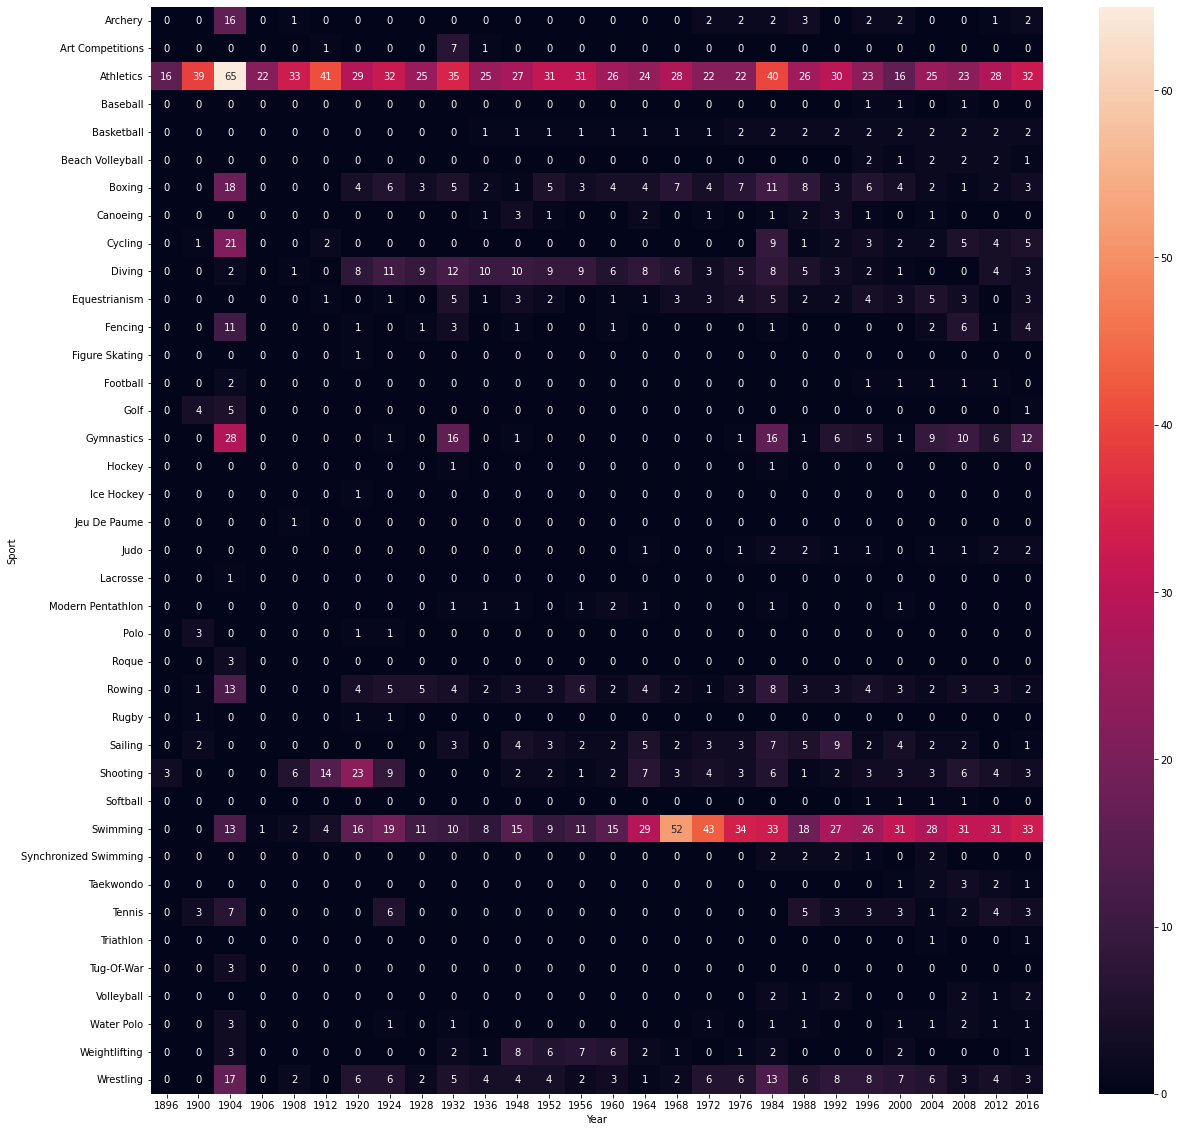

In [ ]:
new_df = temp_df[temp_df['region'] == 'USA']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0).astype('int'),annot=True)

In [ ]:
def most_successful_country_athletes(df,country):
    temp_df = df.dropna(subset=['Medal'])
    temp_df = temp_df[temp_df['region'] == country]
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x

In [ ]:
x = most_successful_country_athletes(df,'Jamaica')
x

,Name,Medals,Sport
0,Merlene Joyce Ottey-Page,9,Athletics
19,Veronica Angella Campbell-Brown,8,Athletics
30,Usain St. Leo Bolt,8,Athletics
40,Shelly-Ann Fraser-Pryce,6,Athletics
47,Arthur Stanley Wint,4,Athletics
53,Novlene Hilaire Williams-Mills,4,Athletics
60,"Herbert Henry ""Herb"" McKenley",4,Athletics
66,"Donald O'Reilly ""Don"" Quarrie",4,Athletics
75,Yohan Blake,4,Athletics
81,Juliet Jean Cuthbert,3,Athletics


In [ ]:
fig = px.bar(x, x='Name', y='Medals', color='Sport', color_continuous_scale='Bluered_r', labels={
        "Name": "Name of the athletes",
        "Medals": "Total medals won by the athletes",
        "Sport": "Sports played by the athletes"
    },)
fig.update_layout(template='plotly_dark',height=700,title='Topmost athletes of Jamaica')

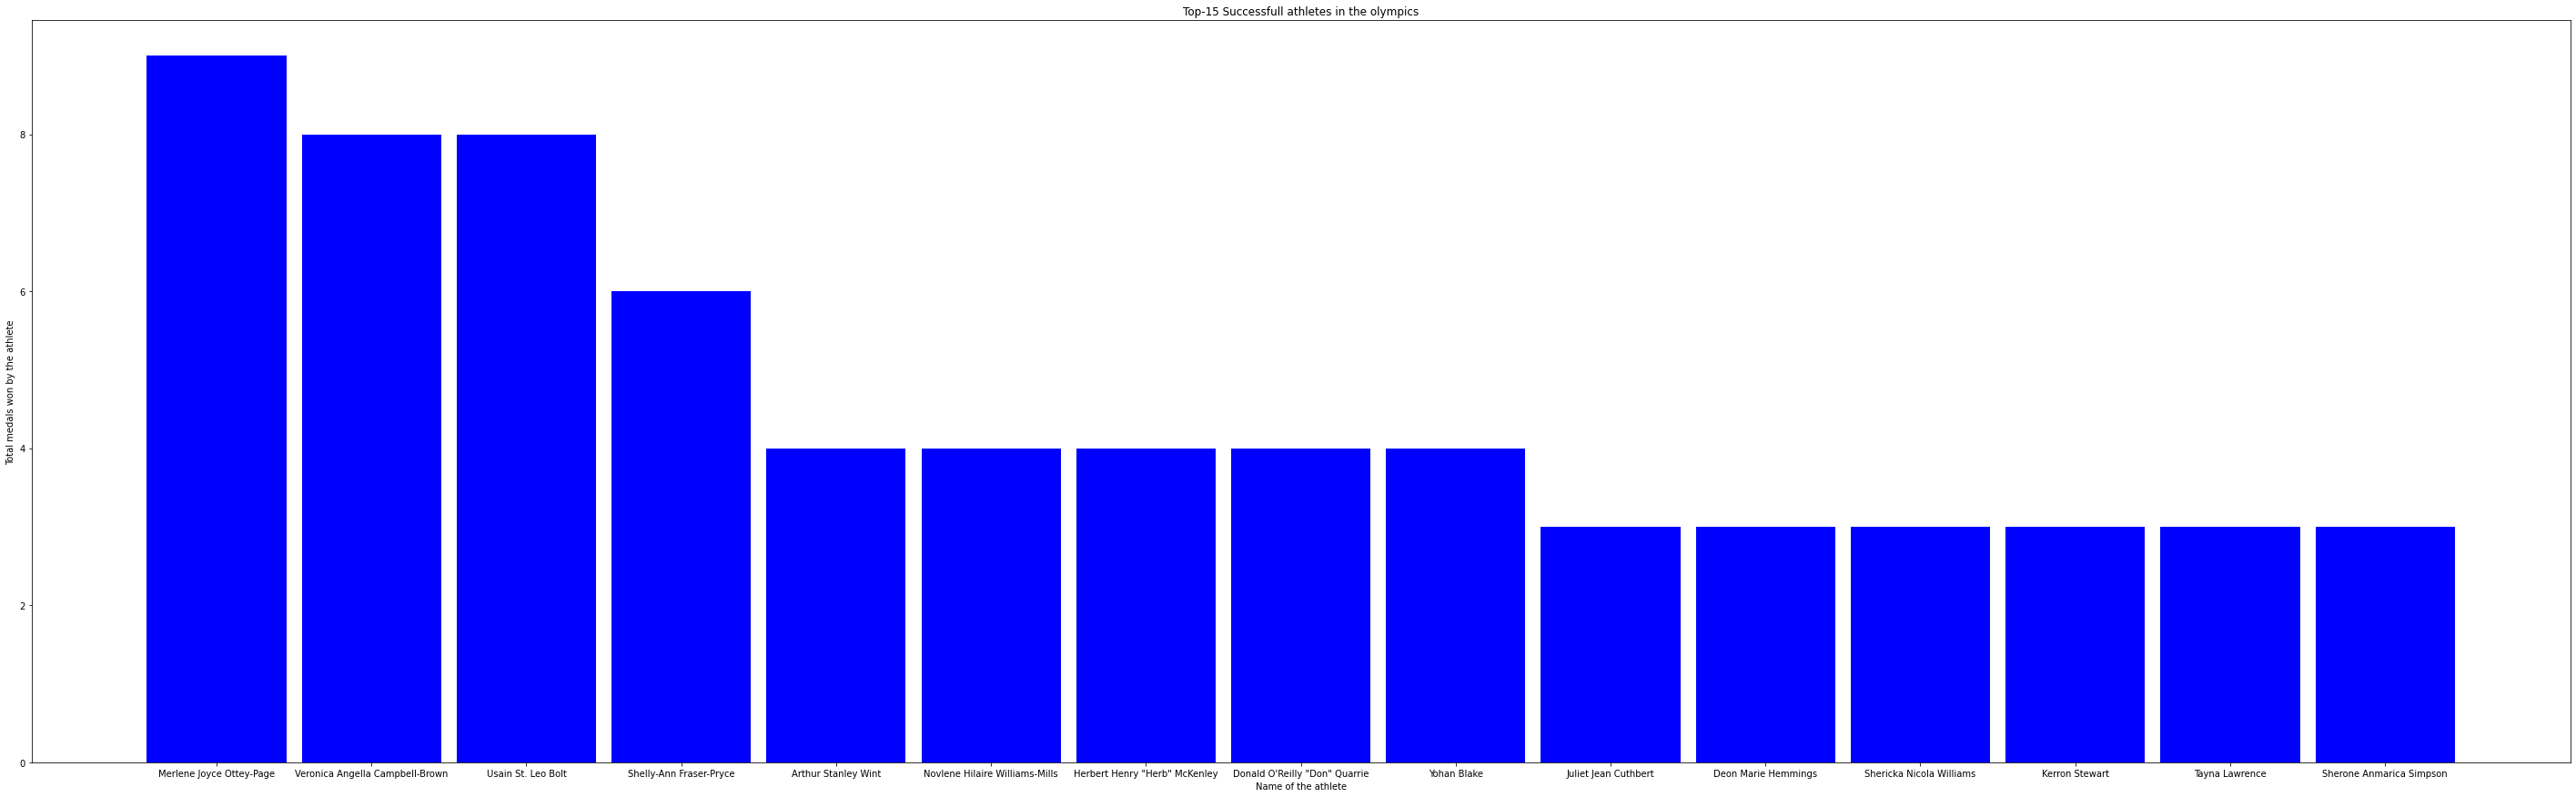

In [ ]:
fig = plt.figure(figsize = (50, 15))

# creating the bar plot
plt.bar(x['Name'], x['Medals'], color ='blue',	width = 0.9)

plt.xlabel("Name of the athlete")
plt.ylabel("Total medals won by the athlete")
plt.title("Top-15 Successfull athletes in the olympics")
plt.show()

## 4 - Athlete Wise Analysis

In [ ]:
athlete_df = df.drop_duplicates(subset=['Name','region'])
athlete_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222544,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN,1,0,0
222546,135565,Fernando scar Zylberberg,M,23.0,168.0,76.0,Argentina,ARG,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [ ]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [ ]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.update_layout(template='plotly_dark',title='Distribution of Age')
fig.show()

In [ ]:
sns.displot(data=athlete_df, [x1,x2,x3,x4], kind="kde")


SyntaxError: ignored

In [ ]:
x = []
name = []
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics', 'Art Competitions',
                     'Handball', 'Weightlifting', 'Wrestling', 'Water Polo', 'Hockey',
                     'Rowing', 'Fencing', 'Shooting', 'Boxing', 'Taekwondo', 'Cycling',
                     'Diving', 'Canoeing', 'Tennis', 'Golf', 'Softball', 'Archery', 'Volleyball',
                     'Synchronized Swimming', 'Table Tennis', 'Baseball', 'Rhythmic Gymnastics',
                     'Rugby Sevens', 'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)
fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
fig.update_layout(title='Distribution of Age wrt Sports(Gold Medalist)',template='plotly_dark')
    

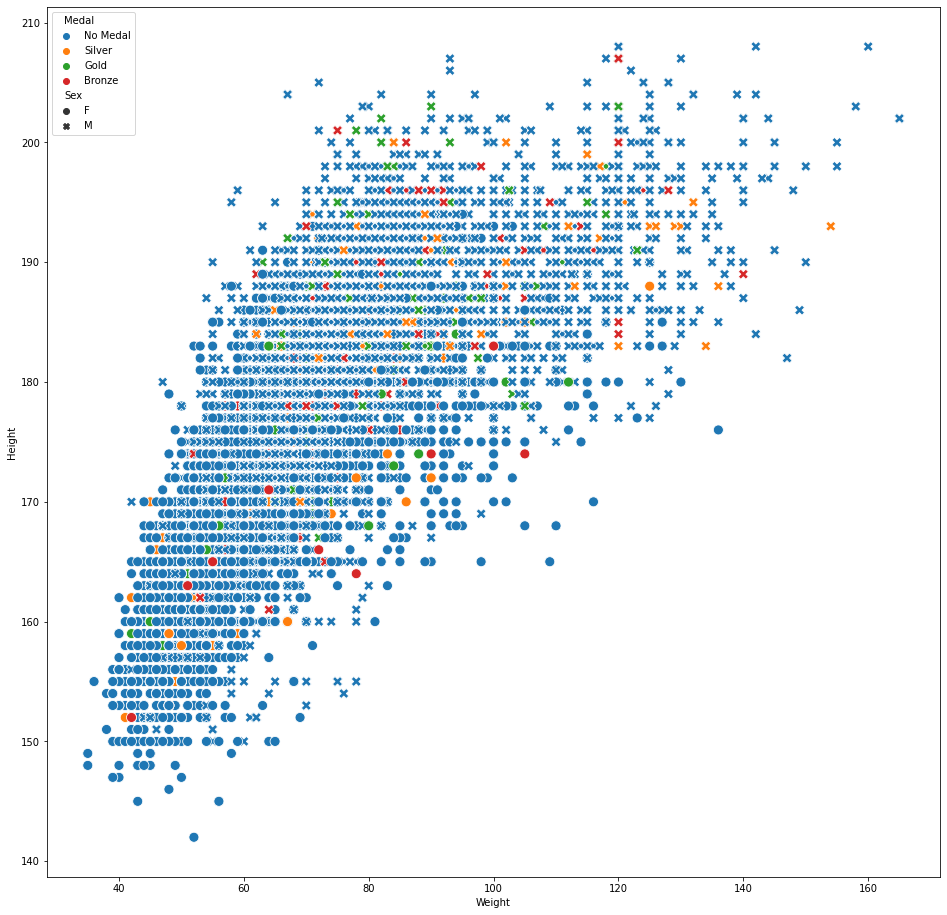

In [ ]:
athlete_df['Medal'].fillna('No Medal',inplace=True)
plt.figure(figsize=(16,16))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(athlete_df['Weight'],temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],s=100)

In [ ]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [ ]:
final = men.merge(women,on='Year',how='left')
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)
final = final.fillna(0)
final

,Year,Male,Female
0,1896,174,0.0
1,1900,1181,23.0
2,1904,629,6.0
3,1906,759,6.0
4,1908,1772,44.0
5,1912,1978,53.0
6,1920,2280,73.0
7,1924,2535,132.0
8,1928,2342,285.0
9,1932,1382,162.0


In [ ]:
fig = px.line(final,x='Year',y=['Male','Female'])
fig.update_layout(template='plotly_dark',title='Participation of men and women over the years')
fig.show()

ValueError: ignored